# Определение перспективного тарифа для телеком компании

### Описание проекта

Заказчик - оператор сотовой связи.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Имеются данные 500 пользователей компании: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Необходимо выполнить предварительный анализ тарифов на небольшой выборке клиентов для планирования рекламного бюджета, определить более прибыльный тариф на основании поведения клиентов. Для анализа заказчиком предоставлены данные о пользователях, об объемах услуг, использованных клиентами за 2018 год, и информация о тарифных планах.

### Содержание <a id="content"></a>
Шаг 1. [Изучение общей информации](#step_1)

Шаг 2. [Подготовка данных](#step_2)
* Предобработка данных
  
  *Определение данных для каждого пользователя*
* количество сделанных звонков и израсходованных минут разговора по месяцам
* количество отправленных сообщений по месяцам
* объем израсходованного интернет-трафика по месяцам
* помесячная выручка с каждого пользователя

Шаг 3. [Анализ данных](#step_3)

Шаг 4. [Проверка гипотез](#step_4)

Шаг 5. [Общий вывод](#step_5)

### [Шаг 1. Изучение общей информации](#content) <a id="step_1"></a>

In [1]:
#импорты и настройки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#чтение файлов
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)#в исходном датафрейме имеется колонка с индексами 
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv', index_col = 'tariff_name')#за индекс примем наименование тарифа
users = pd.read_csv('/datasets/users.csv')

* информация о пользователях:

In [2]:
display(users.info(),users.head(5), users.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
366,1366,43,NaN,Санкт-Петербург,Василиса,Фетисова,2018-06-14,smart
233,1233,28,NaN,Воронеж,Сара,Алфимова,2018-05-23,smart
131,1131,36,NaN,Чита,Нина,Афонасьева,2018-12-08,smart
103,1103,52,NaN,Екатеринбург,Эльвира,Лобанова,2018-12-04,smart
76,1076,40,NaN,Уфа,Фёдор,Шарапов,2018-03-10,smart


* информация о звонках:

In [3]:
display(calls.info(),calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


* информация о сообщениях:

In [4]:
display(messages.info(),messages.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
display(internet.info(),internet.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


* информация о тарифах:

(*при открытии файла имя тарифа указано в качестве индекса, эта таблица может быть использована в качестве словаря для определения стоимости оплаченных услуг*)

In [6]:
display(tariffs.info(), tariffs)

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, smart to ultra
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   messages_included      2 non-null      int64
 1   mb_per_month_included  2 non-null      int64
 2   minutes_included       2 non-null      int64
 3   rub_monthly_fee        2 non-null      int64
 4   rub_per_gb             2 non-null      int64
 5   rub_per_message        2 non-null      int64
 6   rub_per_minute         2 non-null      int64
dtypes: int64(7)
memory usage: 128.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


*Уточним период, за который имеется информация (из описания нам известно, что данные за 2018 год)*

In [7]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

### Вывод

#### Для анализа представлены файлы с данными по пользователям за один год. Уникальный идентификатор пользователя в каждом файле хранится в переменной `user_id`, который станет ключом для объединения таблиц. Типы переменных различны, информация о дате - имеет тип переменной `object`, требуется обработка. Имеется лишний столбец `Unnamed: 0` в файле с информацией об интернет-сессиях (дублирует индекс строкиВ таблице с информацией о пользователях в столбце churn_date только 38 значений типа object (это - дата прекращения пользования тарифом), для остальных пользователей тариф еще действует.

### [Шаг 2. Подготовка данных](#content) <a id="step_2"></a>

* технически заменим отсутствующие значения даты смены тарифного плана

In [8]:
users['churn_date'] = users['churn_date'].fillna('2030-01-01')

* изменим в столбцах с датами тип данных на соответствующий

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%dT%H:%M:%S')
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%dT%H:%M:%S')

* просмотрим информацию о длительности интернет-соединений; соединениях, где трафик больше нуля; соотношение количества

In [10]:
internet['mb_used'].value_counts()  

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

In [11]:
internet[internet['mb_used'] > 0].sort_values(by = 'mb_used')

,id,mb_used,session_date,user_id
15944,1055_402,0.03,2018-06-15,1055
85722,1291_278,0.04,2018-08-10,1291
108198,1370_3,0.06,2018-07-18,1370
11027,1038_76,0.07,2018-12-30,1038
11399,1040_22,0.07,2018-11-23,1040
...,...,...,...,...
140299,1471_182,1623.92,2018-07-29,1471
103480,1348_138,1651.25,2018-10-31,1348
7063,1024_118,1651.55,2018-11-15,1024
119156,1402_191,1702.75,2018-10-26,1402


In [12]:
len(internet[internet['mb_used'] == 0]) / len(internet['mb_used'])

0.13118155773916304

* просмотрим информацию о длительности звонков; звонках больше минуты; соотношение количества

In [13]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [14]:
calls[calls['duration'] > 0].sort_values(by = 'duration')

,id,call_date,duration,user_id
194301,1477_49,2018-11-25,0.01,1477
41260,1101_303,2018-11-10,0.01,1101
34112,1083_457,2018-11-08,0.01,1083
153576,1381_451,2018-11-28,0.01,1381
201119,1495_506,2018-11-14,0.01,1495
...,...,...,...,...
60889,1153_135,2018-11-16,35.95,1153
39777,1099_150,2018-08-14,36.12,1099
5865,1017_61,2018-11-13,36.47,1017
178737,1446_22,2018-11-07,37.35,1446


*имеется 39613  звонков длительностью 0 минут, 162994 - более 0 минут (сумма 202607)*

In [15]:
len(calls[calls['duration'] == 0]) / len(calls['duration'])

0.19551644316336553

##### 13% интернет-соединений объемом 0 Мб и 20 % звонков длительностью 0 минут. Телеком-компания округляет длительность звонков и траффика до целого в большую сторону. Нулевые  - не оплачиваютcя клиентом.
"Нулевые" звонки -  это звонки без ответа, или те, которые были сброшены намеренно. Такие данные можно исключить, но сначала проверим соотношение количества всех вызовов двух тарифов, а также соотношение количества нулевых вызовов с разбивкой по тарифам. 

*для проверки объединим только файлы с количеством звонков и пользователями*
____________________________

In [16]:
full_calls = calls.merge(users, on = ['user_id'], how = 'outer')
full_calls.tail(10)

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
202605,1499_218,2018-10-06,4.27,1499,35,2030-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart
202606,1499_219,2018-12-14,19.62,1499,35,2030-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart
202607,NaN,NaT,NaN,1091,36,2030-01-01,Набережные Челны,Вера,Суслова,2018-05-08,ultra
202608,NaN,NaT,NaN,1106,67,2030-01-01,Калуга,Исаак,Костин,2018-04-26,ultra
202609,NaN,NaT,NaN,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
202610,NaN,NaT,NaN,1231,63,2030-01-01,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
202611,NaN,NaT,NaN,1328,44,2030-01-01,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
202612,NaN,NaT,NaN,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
202613,NaN,NaT,NaN,1473,18,2030-01-01,Красноярск,Николай,Лебедев,2018-08-05,ultra
202614,NaN,NaT,NaN,1489,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


*Полученная таблица содержит пользователей, которые не совершали звонков. Удалим эти строки*

In [17]:
full_calls = full_calls.dropna()
display(full_calls.groupby(['tariff']).agg({'id':'count'}))
display(full_calls[full_calls['duration']==0].groupby(['tariff']).agg({'id':'count'}))

,id
tariff,
smart,130315
ultra,72292


,id
tariff,
smart,25669
ultra,13944


*соотношение одинаково (около 1,8), тип тарифа не влияет на нулевые звонки, удалим нулевые значения в таблицах*

In [18]:
calls = calls[calls['duration'] != 0].reset_index(drop = True)
calls

,id,call_date,duration,user_id
0,1000_2,2018-06-11,2.85,1000
1,1000_3,2018-09-21,13.80,1000
2,1000_4,2018-12-15,5.18,1000
3,1000_7,2018-08-22,18.31,1000
4,1000_8,2018-09-15,18.44,1000
...,...,...,...,...
162989,1499_215,2018-12-26,0.76,1499
162990,1499_216,2018-10-18,18.83,1499
162991,1499_217,2018-11-10,10.81,1499
162992,1499_218,2018-10-06,4.27,1499


In [19]:
internet = internet[internet['mb_used'] != 0].reset_index(drop = True)
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
129793,1499_151,752.72,2018-10-11,1499
129794,1499_152,318.90,2018-10-03,1499
129795,1499_153,490.13,2018-12-14,1499
129796,1499_155,1246.32,2018-11-26,1499


#### добавим в таблицы c информацией о затратах на услуги, столбец `month`, содержащий номер месяца:

In [20]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

##### создадим таблицу с количеством минут звонков с группировкой по пользователю и месяцу, предварительно округлим каждый звонок по правилам оператора

In [21]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype(int)
user_calls = calls.groupby(['user_id', 'month'], as_index = False).agg({'duration' : 'sum'})
user_calls = user_calls.rename(columns={'duration': 'minutes'})
user_calls

,user_id,month,minutes
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3163,1498,10,247
3164,1499,9,70
3165,1499,10,449
3166,1499,11,612


##### количество сообщений с группировкой по пользователю и месяцу

In [22]:
user_messages = messages.groupby(['user_id', 'month'], as_index = False).agg({'id':'count'})
user_messages = user_messages.rename(columns={'id': 'msg'})
user_messages

,user_id,month,msg
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


##### количество траффика с группировкой по пользователю и месяцу, предварительно округлим по правилам оператора.

In [23]:
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype(int)
user_internet = internet.groupby(['user_id', 'month'], as_index = False).agg({'mb_used' : 'sum'})
user_internet 

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3196,1498,10,20604
3197,1499,9,1848
3198,1499,10,17809
3199,1499,11,17984


In [24]:
users_short = pd.DataFrame(data = users, columns = ['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff'])
#создаю укороченный датафрейм с использованием имен столбцов `(users.columns),
#возраст оставила для возможности оценить затраты исходя из возраста

In [25]:
data = (user_internet.merge(user_calls, on = ['user_id', 'month'], how = 'outer')
    .merge(user_messages, on = ['user_id', 'month'], how = 'outer')
    .merge(users_short, on = ['user_id'], how = 'outer'))
data

,user_id,month,mb_used,minutes,msg,age,churn_date,city,reg_date,tariff
0,1000,5.0,2256.0,159.0,22.0,52,2030-01-01,Краснодар,2018-05-25,ultra
1,1000,6.0,23257.0,172.0,60.0,52,2030-01-01,Краснодар,2018-05-25,ultra
2,1000,7.0,14016.0,340.0,75.0,52,2030-01-01,Краснодар,2018-05-25,ultra
3,1000,8.0,14070.0,408.0,81.0,52,2030-01-01,Краснодар,2018-05-25,ultra
4,1000,9.0,14581.0,466.0,57.0,52,2030-01-01,Краснодар,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,315.0,35.0,46,2030-01-01,Курган,2018-05-15,ultra
3212,1273,11.0,NaN,272.0,29.0,46,2030-01-01,Курган,2018-05-15,ultra
3213,1273,12.0,NaN,260.0,39.0,46,2030-01-01,Курган,2018-05-15,ultra
3214,1128,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,2018-12-15,ultra


Две нижние строки таблицы удалим - это пользователи, которые прекратили пользоваться тарифом, не пользовавшиеся услугами оператора вообще.

In [26]:
data = data.dropna(subset=['month'])
data = data.fillna(0)
data

,user_id,month,mb_used,minutes,msg,age,churn_date,city,reg_date,tariff
0,1000,5.0,2256.0,159.0,22.0,52,2030-01-01,Краснодар,2018-05-25,ultra
1,1000,6.0,23257.0,172.0,60.0,52,2030-01-01,Краснодар,2018-05-25,ultra
2,1000,7.0,14016.0,340.0,75.0,52,2030-01-01,Краснодар,2018-05-25,ultra
3,1000,8.0,14070.0,408.0,81.0,52,2030-01-01,Краснодар,2018-05-25,ultra
4,1000,9.0,14581.0,466.0,57.0,52,2030-01-01,Краснодар,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3209,1273,8.0,0.0,253.0,41.0,46,2030-01-01,Курган,2018-05-15,ultra
3210,1273,9.0,0.0,223.0,32.0,46,2030-01-01,Курган,2018-05-15,ultra
3211,1273,10.0,0.0,315.0,35.0,46,2030-01-01,Курган,2018-05-15,ultra
3212,1273,11.0,0.0,272.0,29.0,46,2030-01-01,Курган,2018-05-15,ultra


In [27]:
def month_payment_calculation(row):
    minutes = row['minutes']
    msg = row['msg']
    mb_used = row['mb_used']
    tariff = row['tariff']
     
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    msg_lim = tariffs.loc[tariff, 'messages_included']
    internet_lim = tariffs.loc[tariff, 'mb_per_month_included']
    
    call_overlimit = max(minutes - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariff, 'rub_per_minute']
    
    msg_overlimit = max(msg - msg_lim, 0)
    msg_overpay = msg_overlimit * tariffs.loc[tariff, 'rub_per_message']
    
    internet_overlimit = max(mb_used - internet_lim, 0) / 1024
    internet_overlimit = np.ceil(internet_overlimit)
    internet_overpay =  internet_overlimit * tariffs.loc[tariff, 'rub_per_gb']
    
    check_sum = tariffs.loc[tariff, 'rub_monthly_fee'] + call_overpay + msg_overpay + internet_overpay
    
    return check_sum 

In [28]:
data['total_sum'] = data.apply(month_payment_calculation, axis = 1)
display(data.info(),data.sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3214 non-null   int64         
 1   month       3214 non-null   float64       
 2   mb_used     3214 non-null   float64       
 3   minutes     3214 non-null   float64       
 4   msg         3214 non-null   float64       
 5   age         3214 non-null   int64         
 6   churn_date  3214 non-null   datetime64[ns]
 7   city        3214 non-null   object        
 8   reg_date    3214 non-null   datetime64[ns]
 9   tariff      3214 non-null   object        
 10  total_sum   3214 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 301.3+ KB


None

,user_id,month,mb_used,minutes,msg,age,churn_date,city,reg_date,tariff,total_sum
633,1099,12.0,16763.0,640.0,46.0,67,2030-01-01,Тольятти,2018-03-16,ultra,1950.0
871,1137,12.0,16197.0,705.0,19.0,64,2030-01-01,Кемерово,2018-12-02,smart,1365.0
207,1032,8.0,24848.0,446.0,47.0,31,2030-01-01,Ульяновск,2018-01-04,smart,2550.0
387,1061,10.0,16624.0,588.0,9.0,41,2030-01-01,Санкт-Петербург,2018-07-15,smart,1214.0
1294,1202,12.0,15502.0,287.0,49.0,22,2030-01-01,Владивосток,2018-09-20,smart,750.0


### Вывод

#### В результате группировки, объединения и обработки файлов получена таблица из 3214 строк, включающая сведения об активных пользователях. Для каждого пользователя определены сведения по использованию услуг тарифа за каждый месяц и посчитаны затраты пользователей (ежемесячная выручка оператора).

### [Шаг 3. Анализ данных](#content) <a id="step_3"></a>

Определим основные характеристики данных пользователей двух тарифов.

In [55]:
print('Количество пользователей тарифа "Ультра":', len(users.query('tariff == "ultra"')))
print('Количество пользователей тарифа "Смарт":', len(users.query('tariff == "smart"')))
print()
print('Выручка с пользователей тарифа "Ультра":', int(data.query('tariff == "ultra"')['total_sum'].sum()))
print('Выручка с пользователей тарифа "Смарт":', int(data.query('tariff == "smart"')['total_sum'].sum()))

Количество пользователей тарифа "Ультра": 149
Количество пользователей тарифа "Смарт": 351

Выручка с пользователей тарифа "Ультра": 2040000
Выручка с пользователей тарифа "Смарт": 2885751


In [30]:
data.query('tariff == "ultra"').describe()

,user_id,month,mb_used,minutes,msg,age,total_sum
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,19486.901523,526.623350,49.363452,46.834518,2071.065990
std,140.694908,2.871762,10096.317202,317.606098,47.804457,17.107979,378.802377
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,1950.000000
25%,1143.000000,6.000000,11785.000000,284.000000,6.000000,30.000000,1950.000000
50%,1277.000000,9.000000,19324.000000,518.000000,38.000000,45.000000,1950.000000
75%,1381.000000,11.000000,26863.000000,752.000000,79.000000,63.000000,1950.000000
max,1495.000000,12.000000,49789.000000,1673.000000,224.000000,75.000000,4800.000000


In [31]:
data.query('tariff == "smart"').describe()

,user_id,month,mb_used,minutes,msg,age,total_sum
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,16229.188425,417.934948,33.384029,46.556303,1294.639300
std,146.119496,2.920316,5877.576978,190.313730,28.227876,16.353371,820.933202
min,1001.000000,1.000000,0.000000,0.000000,0.000000,18.000000,550.000000
25%,1121.000000,6.000000,12658.000000,282.000000,10.000000,32.000000,550.000000
50%,1239.000000,9.000000,16531.000000,422.000000,28.000000,47.000000,1038.000000
75%,1376.000000,11.000000,20068.000000,545.000000,51.000000,62.000000,1750.000000
max,1499.000000,12.000000,38610.000000,1435.000000,143.000000,75.000000,6770.000000


За год больше выручки получено с пользователей тарифа "Смарт", однако, число пользователей тарифа "Смарт" в представленной выборке больше, чем в два раза. Если сравнивать средние и медианные значения объемов услуг - они незначительно отличаются, следовательно в данных нет значительных статистических выбросов (кроме количества сообщений в данных тарифа "Ультра").
Среднее значение выручки тарифа "Смарт" за месяц ниже, чем среднее тарифа "Ультра". При этом, три квантиля выручки с тарифа "Ультра" - это размер абонентской платы, то есть более 75% пользователей этого тарифа, "укладываются" в абонентскую плату.

Посмотрим на графиках.

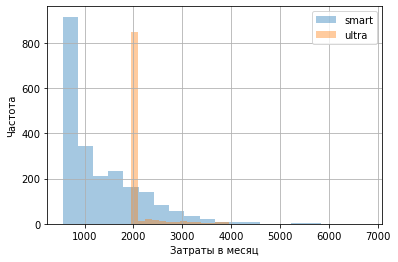

In [32]:
ax = (plt.hist(x=data.query('tariff == "smart"')['total_sum'],
    bins=20, range = (data.query('tariff == "smart"')['total_sum'].min(), data.query('tariff == "smart"')['total_sum'].max()),
    label  = 'smart', alpha = 0.4))
plt.hist(x=data.query('tariff == "ultra"')['total_sum'],
    bins=20, range = ((data.query('tariff == "ultra"')['total_sum'].min(), data.query('tariff == "ultra"')['total_sum'].max())),
    label = 'ultra', alpha = 0.4)
 
plt.ylabel('Частота')
plt.xlabel('Затраты в месяц')
plt.grid() 
plt.legend();

Пользователи тарифа "Смарт" тратят в основном до 1000 руб. в месяц, тода как большая часть пользователей тарифа "Ультра" - оплачивают только абонентскую плату.

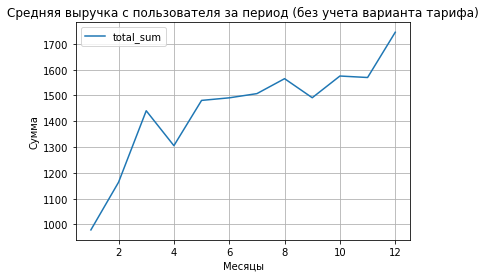

In [33]:
data.pivot_table(index = 'month', values = 'total_sum', aggfunc = 'mean').plot(grid = True)
plt.xlabel('Месяцы')
plt.ylabel('Сумма')
plt.title('Средняя выручка с пользователя за период (без учета варианта тарифа)');   

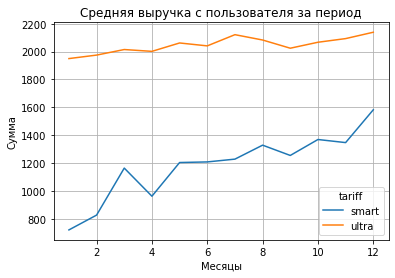

In [34]:
data.pivot_table(index = 'month',columns = 'tariff', values = 'total_sum', aggfunc = 'mean').plot(grid = True, )
plt.xlabel('Месяцы')
plt.ylabel('Сумма')
plt.title('Средняя выручка с пользователя за период');    

К концу года наблюдается рост выручки - в основном за счет пользователей тарифа "Смарт", хотя, и с пользователей тарифа "Ультра" выручка не падает. 

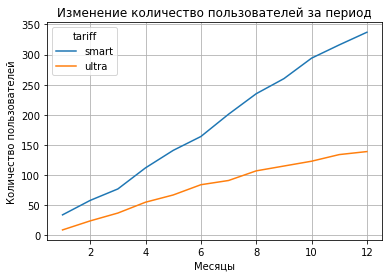

In [35]:
data.pivot_table(index = 'month',columns = 'tariff', values = 'user_id', aggfunc = 'count').plot(grid = True, )
plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')
plt.title('Изменение количество пользователей за период');

In [36]:
data_relation = data.pivot_table(index = 'month',columns = 'tariff', values = 'total_sum', aggfunc = ['mean','count'])
data_relation['relation'] =  data_relation[('count', 'ultra')] / data_relation[('count', 'smart')]
data_relation

mean              count        relation
tariff        smart        ultra smart ultra          
month                                                 
1.0      721.323529  1950.000000    34     9  0.264706
2.0      827.603448  1975.000000    58    24  0.413793
3.0     1164.623377  2014.864865    77    37  0.480519
4.0      963.089286  2001.818182   112    55  0.491071
5.0     1204.602837  2061.940299   141    67  0.475177
6.0     1208.896341  2041.071429   164    84  0.512195
7.0     1228.925373  2121.428571   201    91  0.452736
8.0     1329.106383  2083.177570   235   107  0.455319
9.0     1255.330769  2024.347826   260   115  0.442308
10.0    1369.615646  2067.073171   294   123  0.418367
11.0    1347.477848  2093.283582   316   134  0.424051
12.0    1582.685460  2138.848921   337   139  0.412463

Объем выручки увеличивается в связи с ростом числа пользователей и ростом выручки с пользователя. Рост числа пользователей "Смарта" также активнее. Следует обратить внимание на падение показателей в апереле, выяснить причины снижения.

Построим графики пользования услугами за период:

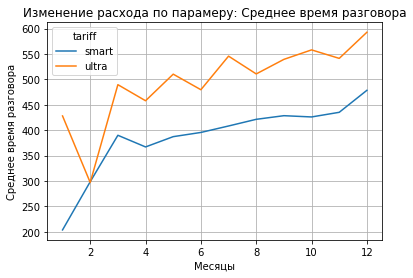

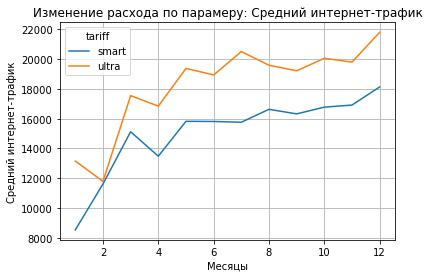

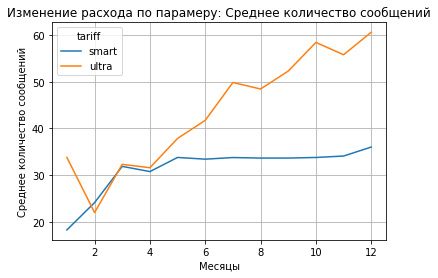

In [37]:
for i in ['minutes','mb_used','msg']:
    data.pivot_table(index = 'month',columns = 'tariff', values = i, aggfunc = 'mean').plot(grid = True)
    if i == 'minutes':
        i = 'Среднее время разговора'
    elif i == 'mb_used': 
        i = 'Средний интернет-трафик'
    else:
        i = 'Среднее количество сообщений'
        
    plt.xlabel('Месяцы')
    plt.ylabel(i)
    plt.title('Изменение расхода по парамеру: {}'.format (i))
    plt.show

Средниий рост объема услуг обусловлен ростом числа пользователей.

Определим средние значения количества услуг для каждого тарифа и посчитаем статистические параметры выборки: среднее количество, дисперсию и стандартное отклонение

* Звонки 

Изобразим на графике частот среднее количество звонков абонентов в месяц, на графиках отметим объемы минут, включенные в абонентскую плату

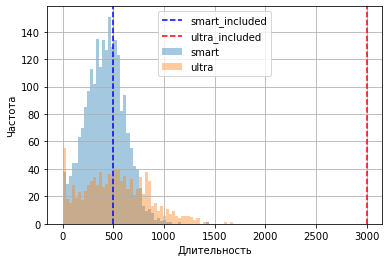

In [38]:
m_s = (tariffs.loc['smart', 'minutes_included'])
m_u = (tariffs.loc['ultra', 'minutes_included'])

ax = plt.hist(x=data.query('tariff == "smart"')['minutes'],bins=100, range = (0, max(m_s,m_u)), label  = 'smart', alpha = 0.4)
plt.hist(x=data.query('tariff == "ultra"')['minutes'],  bins=100, range = (0, max(m_s,m_u)), label = 'ultra', alpha = 0.4)
plt.axvline(m_s,label = 'smart_included', color='b', linestyle='--')
plt.axvline(m_u,label = 'ultra_included', color='r', linestyle='--')
plt.ylabel('Частота')
plt.xlabel('Длительность')
plt.grid()
plt.legend();

Посчитаем количество превышений (для тарифа "Ультра" количество тех, кто превысил половину)

In [39]:
print('Число пользоватетей тарифа "ультра", использовавших более половины включенных в тариф минут: ',\
    len(data[(data['tariff']== "ultra") & (data['minutes'] > m_u/2)]), 'чел.')
print('Процент пользователей тарифа "смарт", превысивших лимит минут: {:.2%}'\
      .format(len(data[(data['tariff']== "smart") & (data['minutes'] > m_s)])/len(data[(data['tariff']== "smart")])))

Число пользоватетей тарифа "ультра", использовавших более половины включенных в тариф минут:  2 чел.
Процент пользователей тарифа "смарт", превысивших лимит минут: 33.83%


Абоненты тарифа "Ультра" не используют количество минут, включенное в абонентскую плату, только дважды пользователи этого тарифа использовали половину предоставленного времени. Пользователи тарифа "Смарт" достаточно часто выходят за пределы абонентской платы (34%)

In [40]:
data.pivot_table(index = 'tariff', values = 'minutes', aggfunc = ['mean','var', 'std'])

,mean,var,std
,minutes,minutes,minutes
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


##### На гистогамме частот распределение длительности звонков тарифа "Смарт" имеет вид , близкий к распределению Пуассона. Распределение длительности звонков тарифа "Ультра"  - равномерное распределение, если принять значительное количество нулевых значений статистическим выбросом. Различие форм гистограмм поясняют отличающиеся значения дисперсии: "Смарт" - 36219, "Ультра" - 100874 и значения стандартного отклонения: "Смарт" - 190, "Ультра" - 318. 

В выборке имеются звонки с длительностью 0. Ранее, при обработке файла с информацией от звонках, мы отбросили звонки с длительностью 0 минут и предположили, что это звонки без ответа. В объединенной выборке - данные с нулевой длительностью звонков у абонентов, которые пользуются другими видами услуг оператора.

In [41]:
data[data['minutes'] == 0].sample(5)

,user_id,month,mb_used,minutes,msg,age,churn_date,city,reg_date,tariff,total_sum
3037,1473,8.0,12917.0,0.0,17.0,18,2030-01-01,Красноярск,2018-08-05,ultra,1950.0
3145,1489,12.0,17341.0,0.0,35.0,35,2030-01-01,Санкт-Петербург,2018-08-15,smart,950.0
570,1091,5.0,10714.0,0.0,30.0,36,2030-01-01,Набережные Челны,2018-05-08,ultra,1950.0
576,1091,11.0,11876.0,0.0,28.0,36,2030-01-01,Набережные Челны,2018-05-08,ultra,1950.0
671,1106,4.0,2925.0,0.0,9.0,67,2030-01-01,Калуга,2018-04-26,ultra,1950.0


Это в основном, пользователи тарифа "ультра", который предполагает больший пакет интернета в абонентской плате

* Интернет

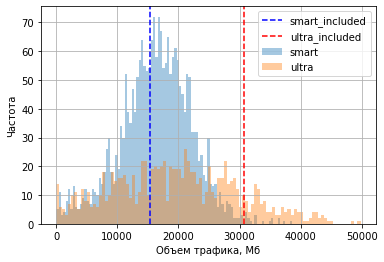

In [42]:
i_s = (tariffs.loc['smart', 'mb_per_month_included'])
i_u = (tariffs.loc['ultra', 'mb_per_month_included'])

ax = plt.hist(x=data.query('tariff == "smart"')['mb_used'],bins=100, label  = 'smart', alpha = 0.4)
plt.hist(x=data.query('tariff == "ultra"')['mb_used'],  bins=100, label = 'ultra', alpha = 0.4)
plt.axvline(i_s,label = 'smart_included', color='b', linestyle='--')
plt.axvline(i_u,label = 'ultra_included', color='r', linestyle='--')


plt.ylabel('Частота')
plt.xlabel('Объем трафика, Мб')
plt.grid() 
plt.legend();

In [43]:
print('Процент пользователей тарифа "смарт", превысивших лимит интернета: {:.2%}'\
      .format(len(data[(data['tariff']== "smart") & (data['mb_used'] > i_s)])/len(data[(data['tariff']== "smart")])))

print('Процент пользователей тарифа "ультра", превысивших лимит интернета: {:.2%}'\
       .format(len(data[(data['tariff']== "ultra") & (data['mb_used'] > i_u)]) / len(data[(data['tariff']== "ultra")])))

print('Среднемесячное превышение трафика в тарифе "смарт":',\
      int(round(-1*(i_s - data['mb_used'][data['tariff']== "smart"].mean()))), 'Мб')

Процент пользователей тарифа "смарт", превысивших лимит интернета: 58.73%
Процент пользователей тарифа "ультра", превысивших лимит интернета: 13.60%
Среднемесячное превышение трафика в тарифе "смарт": 869 Мб


13% пользователей тарифа "Ультра" и 59% пользователей тарифа "Смарт" превысили лимит интернет трафика, включенного в абонентскую плату. Среднее значение ежемесячного трафика првышает абонентскую плату (тариф "Смарт") на 870 Мб. 

In [44]:
(data[(data['tariff']== "ultra") & (data['mb_used'] > i_u)]).sample(5)

,user_id,month,mb_used,minutes,msg,age,churn_date,city,reg_date,tariff,total_sum
1044,1165,11.0,42182.0,232.0,197.0,19,2030-01-01,Самара,2018-10-14,ultra,3750.0
1161,1180,7.0,34735.0,96.0,17.0,27,2030-01-01,Москва,2018-02-02,ultra,2550.0
1852,1292,12.0,36210.0,226.0,0.0,63,2030-01-01,Красноярск,2018-02-21,ultra,2850.0
937,1148,8.0,34096.0,717.0,14.0,23,2030-01-01,Тольятти,2018-04-17,ultra,2550.0
2635,1412,8.0,37107.0,845.0,43.0,63,2030-01-01,Волгоград,2018-06-05,ultra,3000.0


In [45]:
data.pivot_table(index = 'tariff', values = 'mb_used', aggfunc = ['mean','var', 'std'])

,mean,var,std
,mb_used,mb_used,mb_used
tariff,,,
smart,16229.188425,3.454591e+07,5877.576978
ultra,19486.901523,1.019356e+08,10096.317202


##### На гистогамме частот распределение объема интернет-трафика тарифа "Смарт"  также имеет вид , близкий к распределению Пуассона. Распределение тарифа "Ультра"  - равномерное распределение. Здесь также отличается среднее значение, различие форм гистограмм поясняют отличающиеся значения дисперсии и значения стандартного отклонения: в тарифе "Ультра" значения выше - график более распределен по оси "х".

* Сообщения

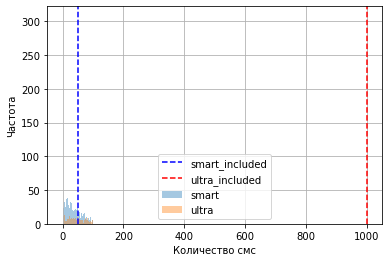

In [46]:
s_s = (tariffs.loc['smart', 'messages_included'])
s_u = (tariffs.loc['ultra', 'messages_included'])

ax = plt.hist(x=data.query('tariff == "smart"')['msg'],bins=100, range = (0,100), label  = 'smart', alpha = 0.4)
plt.hist(x=data.query('tariff == "ultra"')['msg'],  bins=100, range = (0,100), label = 'ultra', alpha = 0.4)
plt.axvline(s_s,label = 'smart_included', color='b', linestyle='--')
plt.axvline(s_u,label = 'ultra_included', color='r', linestyle='--')

plt.ylabel('Частота')
plt.xlabel('Количество смс')
plt.grid() 
plt.legend();

Значительное количество пользователей (в тарифе "смарт" - около 300, в тарифе "ультра" - около 190) не используют услугу передачи сообщений, Пользователям тарифа "Ультра" не требуется такое количество смс, которое включено в абонентскую плату. Посмотрим гистограмму частот без пользователей, не использующих услугу смс:

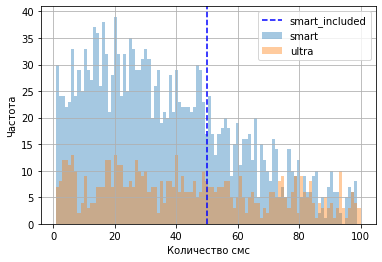

In [47]:
ax = plt.hist(x=data.query('tariff == "smart"')['msg'],bins=100, range = (1,100), label  = 'smart', alpha = 0.4)
plt.hist(x=data.query('tariff == "ultra"')['msg'],  bins=100, range = (1,100), label = 'ultra', alpha = 0.4)
 
plt.ylabel('Частота')
plt.xlabel('Количество смс')
plt.axvline(s_s,label = 'smart_included', color='b', linestyle='--') 
plt.grid()
plt.legend();

In [48]:
data.pivot_table(index = 'tariff', values = 'msg', aggfunc = ['mean','var', 'std'])

,mean,var,std
,msg,msg,msg
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


##### Гистогамма частот количества сообщений имеет вид, аналогичный предыдущим гистограммам, близкий к распределению Пуассона. Распределение тарифа "Ультра"  - равномерное распределение. Здесь также отличается среднее значение, значения дисперсии и значения стандартного отклонения в тарифе "ультра" выше  чем в тарифе "Смарт".

### Вывод

#### Начиная с марта наблюдается рост использования услуг оператора,  однако, предоставленные лимиты по звонкам и количеству смс, предоставленные абонентам тарифа "Ультра", не выбираются пользователями. Затраты трех четвертей абонентов тарифа "Ультра" не превышают абонентской платы.####

#### Клиенты, использующие тариф "Ультра" используют услуги оператора  в объемах, которые варьируются в очень широких пределах, в отличие от пользователей тарифа "Смарт", количество услуг по которым можно описать распределением "Пуассона" с достаточно предсказуемыми значениями.####

### [Шаг 4. Проверка гипотез](#content) <a id="step_4"></a>

* Гипотеза: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

Для проверки этой гипотезы необходимо сравнить средние значения двух совокупностей: срезы данных по условию принадлежности пользователей к тарифу. Сравниваются две выборки между собой.

Сформулируем нулевую и альтернативную гипотезы:
- H0: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»
- H1: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»

Проверку произведем методом `scipy.stats.ttest_ind (array1, array2, equal_var)`для двух неравных выборок

In [49]:
print(
    'Средняя выручка по пользователям тарифа "Ультра":',
     round(data.query('tariff == "ultra"')['total_sum'].mean(),1)
    )
print(
    'Средняя выручка по пользователям тарифа "Смарт":',
     round(data.query('tariff == "smart"')['total_sum'].mean(),1)
      )

Средняя выручка по пользователям тарифа "Ультра": 2071.1
Средняя выручка по пользователям тарифа "Смарт": 1294.6


Среднее значение отличается, зададим параметр alpha = 0.01

In [50]:
alpha = 0.01

results_t = st.ttest_ind(data.query('tariff == "ultra"')['total_sum'],data.query('tariff == "smart"')['total_sum'])

print('p-значение:', results_t.pvalue)

if results_t.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


##### С высокой долей вероятности гипотеза: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" может быть принята

* Гипотеза: "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для проверки этой гипотезы необходимо сравнить средние значения двух совокупностей: срезы данных по условию "пользователь из Москвы" или "пользователь не из Москвы". Сравниваются две выборки между собой.

Сформулируем нулевую и альтернативную гипотезы:

- H0: Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
- H1: Cредняя выручка пользователей из Москвы  не равна средней выручке пользователей из других регионов

Проверку произведем методом `scipy.stats.ttest_ind (array1, array2, equal_var)`

In [51]:
print(
    'Средняя выручка пользователей из Москвы:',
    round(data.query('city == "Москва"')['total_sum'].mean(),1)
    )
print(
    'Средняя выручка пользователей не из Москвы:',
     round(data.query('city != "Москва"')['total_sum'].mean(),1)
      )

Средняя выручка пользователей из Москвы: 1550.8
Средняя выручка пользователей не из Москвы: 1528.3


Среднее значение похоже, зададим параметр alpha = 0.01 

In [52]:
alpha = 0.05

results_m = st.ttest_ind(data.query('city == "Москва"')['total_sum'],data.query('city != "Москва"')['total_sum'])

print('p-значение:', results_m.pvalue)

if results_m.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


##### Не можем отвергнуть нулевую гипотезу о равенстве выручки пользователей из Москвы и пользователей из других регионов.

#### Клиенты, использующие тариф "Ультра" приносят оператору больший доход. Выручка пользователей из Москвы такая же, как и пользователей других городов.

### [Шаг 5. Общий вывод](#content) <a id="step_5"></a>

### Были изучены сведения об использовании двух тарифов оператора "Мегалайн". Пользователи не всегда используют все включенные в абонентскую плату услуги: некоторые не использовали смс, кто-то не использовал даже голосовую связь, а пользовался исключительно интернетом. Все большее распространение получают тарифные планы, в которых предоставляется исключительно интернет.

### За исследуемый период увеличилось количество пользователей. Из представленных для анализа тарифов наибольшую среднюю выручку на пользователя приносит тарифный план "Ультра", не зависимо от того, в каком городе находится его пользователь. При этом больше выручки за год суммарно по всем пользователям больше от пользователей тарифа "Смарт" (нам неизвестны условные затраты на обслуживание одного пользователя, соответственно, сложнее оценить доходность)

### Рекомендации по развитию тарифа должны быть основаны на стратегии оператора: либо привлечение клиентов (предложение востребованных услуг по доступной цене (нацеленность на тариф "Смарт"), либо повышение стоимости для имеющихся клиентов (риск снижения лояльности клиентов).